# 网易云数据分析

字段：title,tag,text,collection,play,songs,comments

### 导入模块，读取数据

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import squarify

In [175]:
df = pd.read_excel('D:/Pandas/music_message.xlsx',header=0,names=['title','tag','text','collection','play','songs','comments'])
df.head()

,title,tag,text,collection,play,songs,comments
0,梦想无处安放的日子 也要时常拿出来晾晒,华语-治愈-感动,介绍：和过去的时光，聊一聊 用文字记下的回忆和许下的心愿，如今正裹挟着时光的风霜，与你撞个满...,824,339509,30,8
1,治愈说唱 I 越过黑暗的那道光,华语-说唱-治愈,介绍：今天，你又是为何戴上耳机？才发现，音乐真的是有力量的，治愈的力量。愿你有好运气，如果没...,2657,387541,42,12
2,《姐姐的爱乐之程》云南站路演,华语-流行-综艺,介绍：一个热爱音乐的纯朴村寨，一颗生长在茶山上的苍天大树，一轮雨后艳丽的彩虹，一段闲适的时光...,1175,204799,8,31
3,你搜不到的土嗨神曲,欧美-摇滚-流行,介绍：【不喜勿喷，自用歌单+村民推荐】这歌单容易嗨上头，如果你开车/走路请注意安全！现在很多...,167万,97074200,212,3972
4,是你的垚/刘大壮/王小帅/王泽科,华语-伤感-翻唱,介绍：喜欢歌单的可以点个关注哟歌单制作：小攀哟歌单创建：2020.4.1歌单修改：2020....,12万,7869796,115,280


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1289 entries, 0 to 1288
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       1289 non-null   object
 1   tag         1289 non-null   object
 2   text        1289 non-null   object
 3   collection  1289 non-null   object
 4   play        1289 non-null   int64 
 5   songs       1289 non-null   int64 
 6   comments    1289 non-null   object
dtypes: int64(2), object(5)
memory usage: 70.6+ KB


### 数据处理、清洗

In [177]:
df['collection'] = df['collection'].astype('string').str.strip()
df['collection'] = [int(str(i).replace('万','0000')) for i in df['collection']]
df['text'] = [str(i)[3:] for i in df['text']]
df['comments'] = [0 if '评论' in str(i).strip() else int(i) for i in df['comments']]

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1289 entries, 0 to 1288
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       1289 non-null   object
 1   tag         1289 non-null   object
 2   text        1289 non-null   object
 3   collection  1289 non-null   int64 
 4   play        1289 non-null   int64 
 5   songs       1289 non-null   int64 
 6   comments    1289 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 70.6+ KB


In [179]:
df.shape

(1289, 7)

### 数据预览

In [180]:
df.head()

,title,tag,text,collection,play,songs,comments
0,梦想无处安放的日子 也要时常拿出来晾晒,华语-治愈-感动,和过去的时光，聊一聊 用文字记下的回忆和许下的心愿，如今正裹挟着时光的风霜，与你撞个满怀。那...,824,339509,30,8
1,治愈说唱 I 越过黑暗的那道光,华语-说唱-治愈,今天，你又是为何戴上耳机？才发现，音乐真的是有力量的，治愈的力量。愿你有好运气，如果没有，愿...,2657,387541,42,12
2,《姐姐的爱乐之程》云南站路演,华语-流行-综艺,一个热爱音乐的纯朴村寨，一颗生长在茶山上的苍天大树，一轮雨后艳丽的彩虹，一段闲适的时光。一场...,1175,204799,8,31
3,你搜不到的土嗨神曲,欧美-摇滚-流行,【不喜勿喷，自用歌单+村民推荐】这歌单容易嗨上头，如果你开车/走路请注意安全！现在很多年轻人...,1670000,97074200,212,3972
4,是你的垚/刘大壮/王小帅/王泽科,华语-伤感-翻唱,喜欢歌单的可以点个关注哟歌单制作：小攀哟歌单创建：2020.4.1歌单修改：2020.9.1...,120000,7869796,115,280


## 构建通用函数，简化代码

get_matplot(x,y,chart,title,ha,size,color)
x表示充当x轴数据；y表示充当y轴数据；chart表示图标类型，这里分为三种barh、hist、squarify.plot；ha表示文本相对朝向；size表示字体大小；color表示图表颜色；

In [181]:
#构建函数
def get_matplot(x,y,chart,title,ha,size,color):
    # 设置图片显示属性,字体及大小
    plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
    plt.rcParams['font.size'] = size
    plt.rcParams['axes.unicode_minus'] = False
    # 设置图片显示属性
    fig = plt.figure(figsize=(16, 8), dpi=80)
    ax = plt.subplot(1, 1, 1)
    ax.patch.set_color('white')
    # 设置坐标轴属性
    lines = plt.gca()
    # 设置显示数据
    if x ==0:
        pass
    else:
        x.reverse()
        y.reverse()
        data = pd.Series(y, index=x)
    # 设置坐标轴颜色
    lines.spines['right'].set_color('none')
    lines.spines['top'].set_color('none')
    lines.spines['left'].set_color((64/255, 64/255, 64/255))
    lines.spines['bottom'].set_color((64/255, 64/255, 64/255))
    # 设置坐标轴刻度
    lines.xaxis.set_ticks_position('none')
    lines.yaxis.set_ticks_position('none')
    if chart == 'barh':
        # 绘制柱状图,设置柱状图颜色
        data.plot.barh(ax=ax, width=0.7, alpha=0.7, color=color)
        # 添加标题,设置字体大小
        ax.set_title(f'{title}', fontsize=18, fontweight='light')
        # 添加歌曲出现次数文本
        for x, y in enumerate(data.values):
            plt.text(y+0.3, x-0.12, '%s' % y, ha=f'{ha}')
    elif chart == 'hist':
        # 绘制直方图,设置柱状图颜色
        ax.hist(y, bins=30, alpha=0.7, color=(21/255, 47/255, 71/255))
        # 添加标题,设置字体大小
        ax.set_title(f'{title}', fontsize=18, fontweight='light')
    elif chart == 'plot':
        colors = ['#adb0ff', '#ffb3ff', '#90d595', '#e48381', '#aafbff', '#f7bb5f', '#eafb50', 
         '#adb0ff', '#ffb3ff', '#90d595', '#e48381', '#aafbff', '#f7bb5f', '#eafb50',
         '#adb0ff', '#ffb3ff', '#90d595', '#e48381', '#aafbff', '#f7bb5f', '#eafb50',
         '#adb0ff', '#ffb3ff', '#90d595', '#e48381', '#aafbff', '#f7bb5f', '#eafb50',
         '#adb0ff', '#ffb3ff', '#90d595', '#e48381', '#aafbff', '#f7bb5f', '#eafb50',
          '#adb0ff', '#ffb3ff', '#90d595', '#e48381', '#aafbff', '#f7bb5f', '#eafb50',
          '#adb0ff', '#ffb3ff', '#90d595', '#e48381', '#aafbff']
        plot = squarify.plot(sizes=y, label=x, color=colors, alpha=1, value=y, edgecolor='white', linewidth=1.5)
        # 设置标签大小为1
        plt.rc('font', size=6)
        # 设置标题大小
        plot.set_title(f'{title}', fontsize=13, fontweight='light')
        # 除坐标轴
        plt.axis('off')
        # 除上边框和右边框刻度
        plt.tick_params(top=False, right=False)
    # 显示图片
    plt.show()

In [182]:
#构建color序列
color = [(153/255, 0/255, 102/255),(8/255, 88/255, 121/255),(160/255, 102/255, 50/255),(136/255, 43/255, 48/255),(16/255, 152/255, 168/255),(153/255, 0/255, 102/255)]

### 1.歌单播放量Top10

In [183]:
df_play = df[['title','play']].sort_values('play',ascending=False)
df_play[:10]

,title,play
40,精选 | 网络热歌分享,502522656
178,那些好听到爆了的歌,135485104
182,精选｜耳熟的翻唱合集,121409168
3,你搜不到的土嗨神曲,97074200
97,你会爱上这个流行华语歌单,69498312
384,超好听的高潮翻唱呀,66282664
158,精选｜Cover的那些循环歌曲,66277840
263,「翻唱」好听的歌永远没有完整版。,55291720
188,网络热播的那些神仙声音（持续更新）,48534648
19,精选｜Cover翻唱百听不腻,36318572


In [184]:
df_play = df_play[:10]
_x = df_play['title'].tolist()
_y = df_play['play'].tolist()

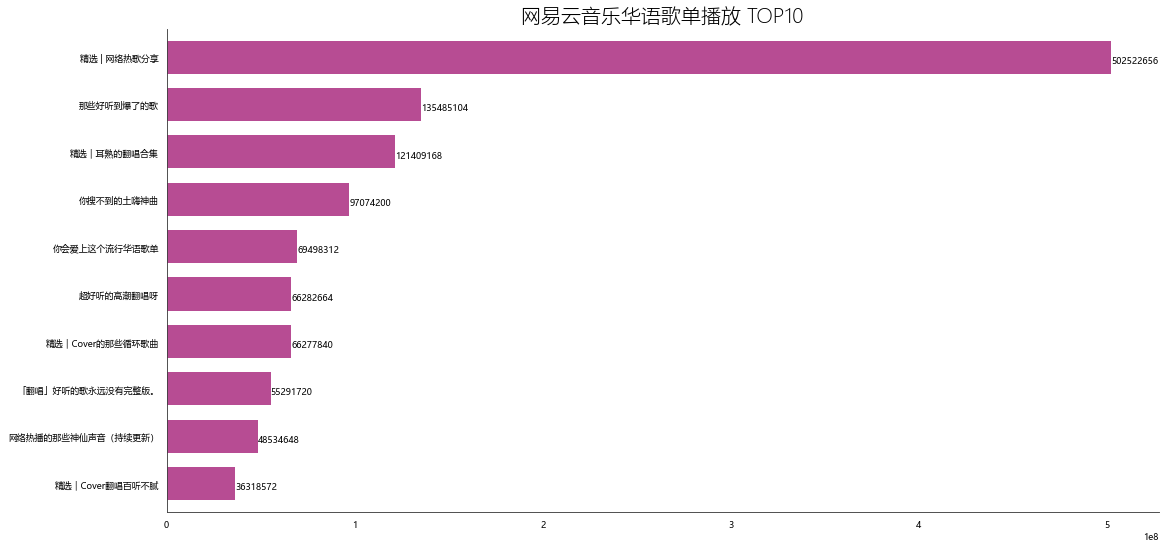

In [185]:
df_play = get_matplot(x=_x,y=_y,chart='barh',title='网易云音乐华语歌单播放 TOP10',ha='left',size=8,color=color[0])
df_play

### 2.歌单收藏量Top10

In [186]:
df_col = df[['title','collection']].sort_values('collection',ascending=False)
df_col[:10]

,title,collection
40,精选 | 网络热歌分享,5460000
3,你搜不到的土嗨神曲,1670000
178,那些好听到爆了的歌,1430000
182,精选｜耳熟的翻唱合集,1380000
384,超好听的高潮翻唱呀,810000
158,精选｜Cover的那些循环歌曲,740000
263,「翻唱」好听的歌永远没有完整版。,690000
97,你会爱上这个流行华语歌单,680000
188,网络热播的那些神仙声音（持续更新）,490000
19,精选｜Cover翻唱百听不腻,430000


In [187]:
df_col = df_col[:10]
_x = df_col['title'].tolist()
_y = df_col['collection'].tolist()

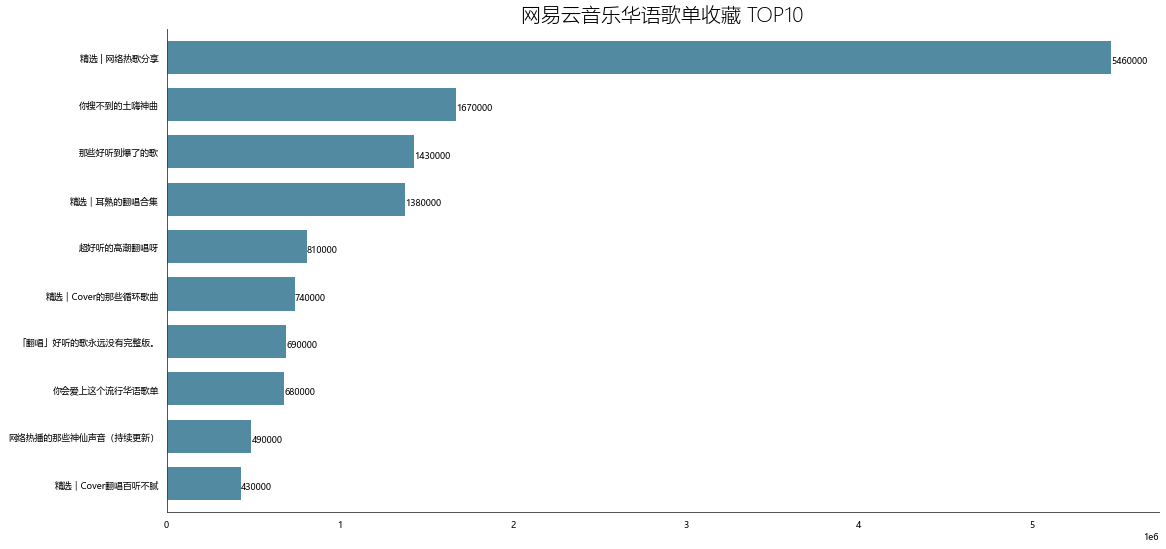

In [188]:
df_col = get_matplot(x=_x,y=_y,chart='barh',title='网易云音乐华语歌单收藏 TOP10',ha='left',size=8,color=color[1])
df_col

### 3.歌单评论数Top10

In [189]:
df_com = df[['title','comments']].sort_values('comments',ascending=False)
df_com[:10]

,title,comments
40,精选 | 网络热歌分享,19159
408,献给用生命托起世界的英雄们,11628
202,致敬黑暗里的光 感谢你们点亮夜空,4700
14,篮球巨星科比，再见,4097
3,你搜不到的土嗨神曲,3972
436,【刷歌升级】60～70秒超短歌曲一万首,3849
349,穿越千万时间线，只想见你,3793
1157,【227大团结】美好的东西是不会死的,3466
144,『中文说唱』 只想私藏的顶级国语Flow,2843
184,摆地摊专用BGM，要的就是回头率！,2822


In [190]:
df_com = df_com[:10]
_x = df_com['title'].tolist()
_y = df_com['comments'].tolist()

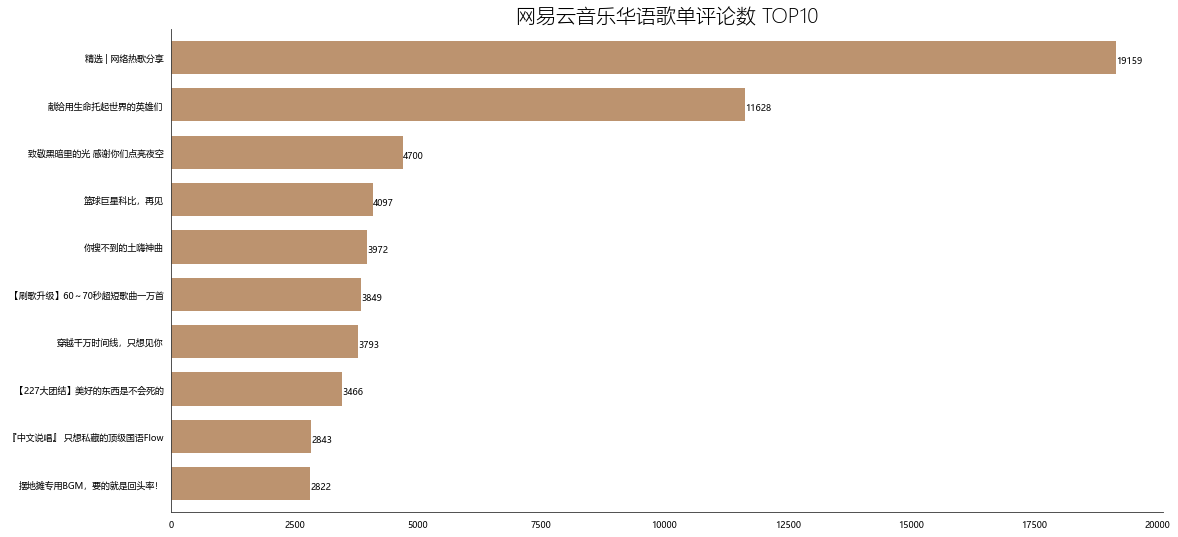

In [191]:
df_com = get_matplot(x=_x,y=_y,chart='barh',title='网易云音乐华语歌单评论数 TOP10',ha='left',size=8,color=color[2])
df_com

### 4.歌单收藏数量分布情况

In [192]:
df_collection = np.log(df['collection'])
df_collection

0        6.714171
1        7.884953
2        7.069023
3       14.328334
4       11.695247
          ...    
1284     4.304065
1285     2.708050
1286     3.970292
1287     6.238325
1288     4.787492
Name: collection, Length: 1289, dtype: float64

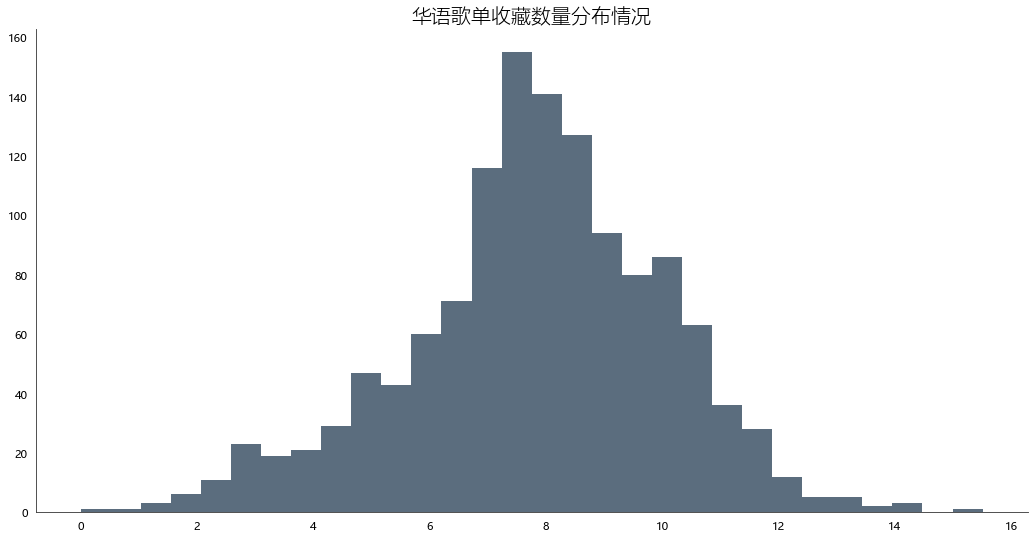

In [193]:
df_collection = get_matplot(x=0,y=df_collection,chart='hist',title='华语歌单收藏数量分布情况',ha='left',size=10,color=color[3])
df_collection

### 5.歌单标签图

In [194]:
def get_tag(df):
    df = df['tag'].str.split('-')
    datalist = list(set(x for data in df for x in data))
    return  datalist
df_tag = get_tag(df)
# df_tag
def get_lx(x,i):
    if i in str(x):
        return 1
    else:
        return 0
for i in list(df_tag):#这里的df['all_category'].unique()也可以自己用列表构建，我这里是利用了前面获得的
    df[i] = df['tag'].apply(get_lx,i=f'{i}')
# df.head()
Series = df.iloc[:,7:].sum().sort_values(0,ascending=False)
df_tag = [tag for tag in zip(Series.index.tolist(),Series.values.tolist())]
df_tag[:10]

[('华语', 1287),
 ('流行', 724),
 ('伤感', 177),
 ('说唱', 172),
 ('治愈', 162),
 ('翻唱', 96),
 ('浪漫', 96),
 ('民谣', 90),
 ('夜晚', 77),
 ('古风', 55)]

In [195]:
df_iex = [index for index in Series.index.tolist()][:20]
df_tag = [tag for tag in Series.values.tolist()][:20]

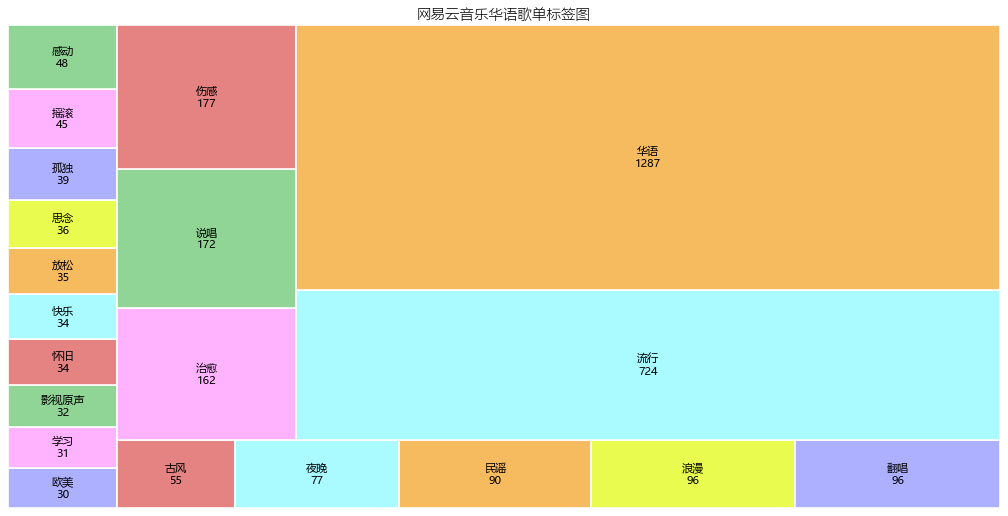

In [196]:
df_tagiex = get_matplot(x=df_iex,y=df_tag,chart='plot',title='网易云音乐华语歌单标签图',size=10,ha='center',color=color[3])
df_tagiex

### 6.歌单介绍词云图

###  词云图1

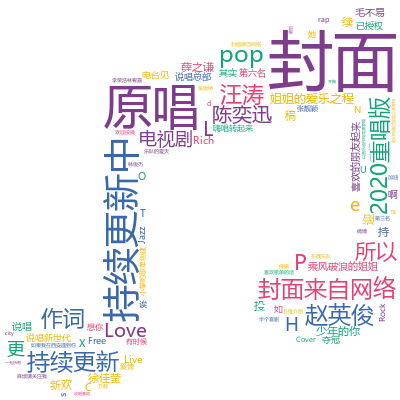

In [197]:
import stylecloud
from IPython.display import Image
stylecloud.gen_stylecloud(text=' '.join(list(df.text)), collocations=False,
                          #palette='cartocolors.qualitative.Pastel_5',
                          font_path=r'‪C:/Windows/Fonts/msyh.ttc',
                          #icon_name='fas fa-dragon',
                          icon_name='fas fa-music',
                          #icon_name='fas fa-cat',
                          #icon_name='fas fa-dove',
                          size=400,
                          output_name='music.png')
#已生成词云图片，这里展示一下
Image(filename='music.png')

### 词云图2

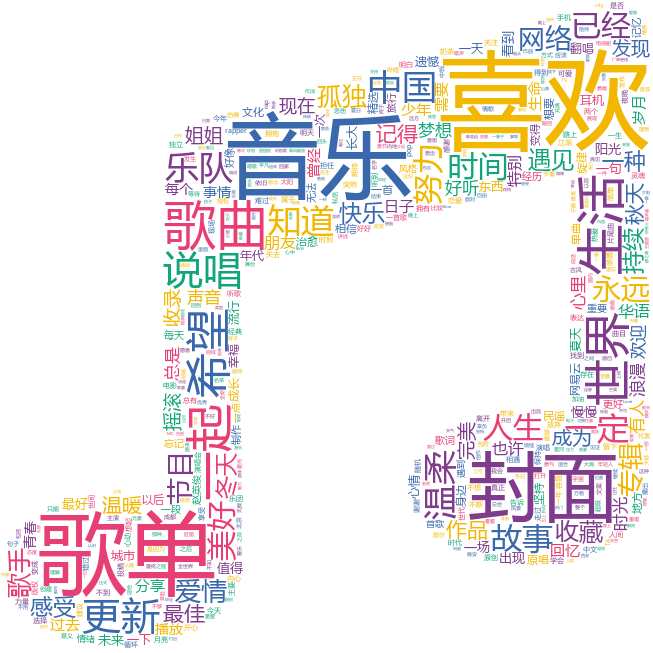

In [198]:
import os  
import jieba
from pyecharts.charts import Bar, Pie, Line, WordCloud, Page
from pyecharts import options as opts 
from pyecharts.globals import SymbolType, WarningType
WarningType.ShowWarning = False

import stylecloud
from IPython.display import Image # 用于在jupyter lab中显示本地图

def get_cut_words(x_series):
    # 读入停用词表
    stop_words = [] 
    
    with open(r"D:/Pandas/已学习/如何制作stylecloud词云？/stop_words.txt", 'r', encoding='utf-8') as f:
        lines = f.readlines()
        for line in lines:
            stop_words.append(line.strip())

    # 添加关键词
    my_words = ['好听', '华语', '喜欢', '音乐', '耳机', '歌手', '网易云']   
    for i in my_words:
        jieba.add_word(i) 

    # 自定义停用词
    my_stop_words = ['哈哈哈', '哈哈哈哈', '评论']
    stop_words.extend(my_stop_words)               

    # 分词
    word_num = jieba.lcut(x_series.astype('str').str.cat(sep='。'), cut_all=False)

    # 条件筛选
    word_num_selected = [i for i in word_num if i not in stop_words and len(i)>=2]
    
    return word_num_selected

text1 = get_cut_words(x_series=df.text)#df.columns某一列

def gen_my_stylecloud(text, file_name, icon_name='fas fa-music'):#这里的icon_name可以自定义更换
    stylecloud.gen_stylecloud(text=' '.join(text), max_words=1000,
                              collocations=False,
                              font_path=r'‪C:/Windows/Fonts/msyh.ttc',
                              icon_name=icon_name,
                              size=653,
                              output_name=f'{file_name}.png'
                             )  
gen_my_stylecloud(text=text1, file_name='music_text')
Image(filename='music_text.png')

### 7.歌曲出现次数TOP10

In [199]:
dfm = pd.read_csv('D:\Pandas\music_name_pandas.csv',encoding='utf-8')
dfm.shape
dfm['name'] = dfm['name'].str.strip()
dfm['count'] = 0
df_name = dfm.groupby('name',as_index=False)['count'].count().sort_values('count',ascending=False)
df_name = df_name[:30]
df_name

,name,count
2047,偏爱,50
1821,会不会（吉他版）,50
4951,永不失联的爱,45
2715,在哪里都很好,42
5953,耗尽,40
1801,他只是经过,37
4563,是但求其爱,36
5086,海底,34
5871,经济舱 (Live),33
3108,如果当时2020,31


In [200]:
df_name = df_name[:10]
names = df_name['name'].tolist()
plays = df_name['count'].tolist()

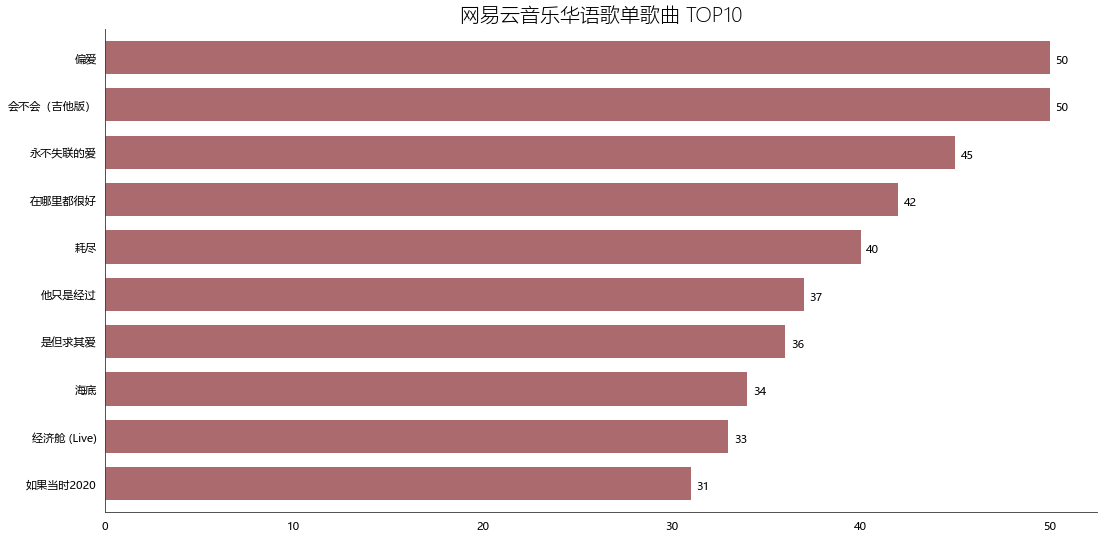

In [201]:
df_name = get_matplot(x=names,y=plays,chart='barh',title='网易云音乐华语歌单歌曲 TOP10',ha='left',size=10,color=color[3])
df_name

### 8.歌单贡献up主Top10

In [202]:
df_user = pd.read_csv('D:\Pandas\playlist.csv',encoding='utf-8',header=0,names=['url','title','play','user'],sep=',')
df_user.shape
df_user = df_user.iloc[:,1:]
df_user['count'] = 0
df_user = df_user.groupby('user',as_index=False)['count'].count()
df_user = df_user.sort_values('count',ascending=False)[:10]
df_user

,user,count
226,原创君,32
289,安阳汪涛,24
356,我自清欢丨被嫌弃的唐唐的一生,19
550,蒙丽娜沙的微笑,14
559,螚安Vivienne,12
114,mayuko然,12
341,情思天鹅,12
260,圈圈的呆子,11
273,大肥猫好可爱哟,11
541,苏奕杰,10


In [203]:
df_user = df_user[:10]
names = df_user['user'].tolist()
nums = df_user['count'].tolist()

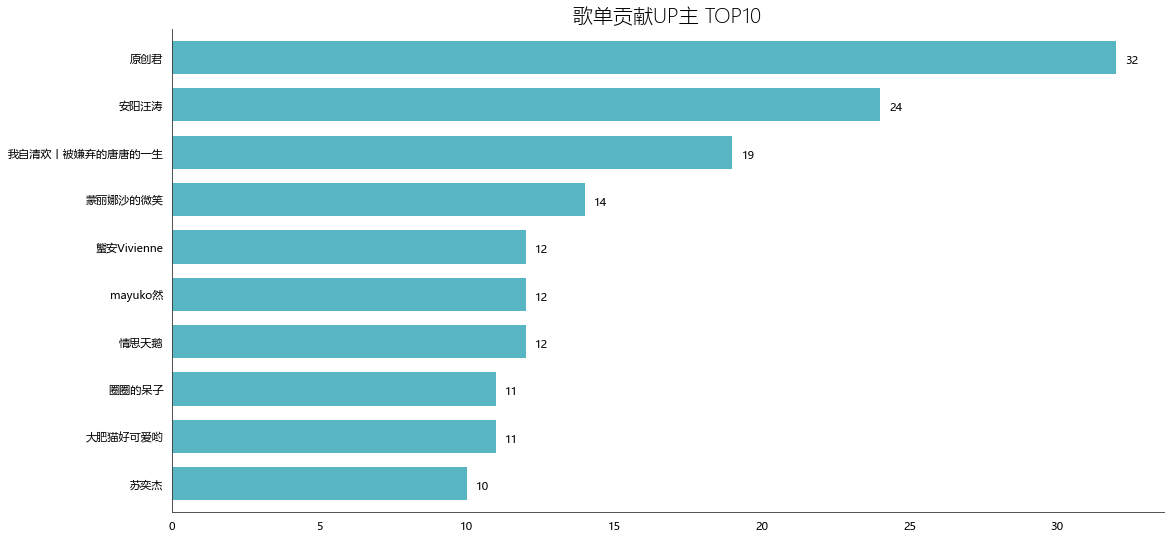

In [205]:
df_u = get_matplot(x=names,y=nums,chart='barh',title='歌单贡献UP主 TOP10',ha='left',size=10,color=color[4])
df_u

## 总结：

csv数据存在部分读取不全的情况，我的解决办法打开一个空的excel，然后打开导入并选中csv，这时会弹出窗口提示你设置分隔符，而不是直接双击csv文件用excel打开，两者有区别。然后对每项数据在excel进行简单筛选，因为有些数据会存在格式问题，当然你也可以直接pd读取，然后根据报错去excel调整相应的列，我这里的问题是collection列的数据存在不能转换int，原因就是有一行的数据没有被分割，手动修改或者直接删除即可。这样得到的效果也有缺失，但是比之前只有800多条多了200多条，还是值得的。究其原因，可能是爬取保存的数据格式或者是默认分隔符为,所致，因为文字信息里面也存在','。